In [30]:
import anndata as ad
import gc
import sys
from scipy.sparse import csc_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
import random
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import pickle
import heapq
import matplotlib
import os
import umap
# import umap.umap_ as umap
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import tqdm
import pandas as pd
import sklearn

In [2]:
loss_file = pd.read_csv('pro_loss_emb_pro.csv')

In [3]:
emb_loss = loss_file.iloc[1:10, 2:]
emb_loss_np = np.array(emb_loss)
emb_loss_np = emb_loss_np.astype(float)

In [4]:
pred_loss = loss_file.iloc[14:, 2:]
pred_loss_np = np.array(pred_loss)
pred_loss_np = pred_loss_np.astype(float)

Nine train batches models, embedding loss and predictionn loss

# auto-encoder model
# base model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.linear1 = nn.Linear(input_feature, 50)
        self.linear2 = nn.Linear(input_feature//2, input_feature//4)
        self.linear3 = nn.Linear(input_feature//4, input_feature//8)
        self.linear4 = nn.Linear(input_feature//8, input_feature//16)
        
        self.linear5 = nn.Linear(50, input_feature+1)
        self.relu = nn.ReLU()
        self.leakyrelu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.15)
        
        self.linear = nn.Linear(input_feature, 1)

    def forward(self, x):
        x = self.linear1(x)
        emb = self.relu(x)
        
        output = self.linear5(emb)
        
        return output.float(), emb

loss = loss_pro + (loss_pro-loss_emb)**2

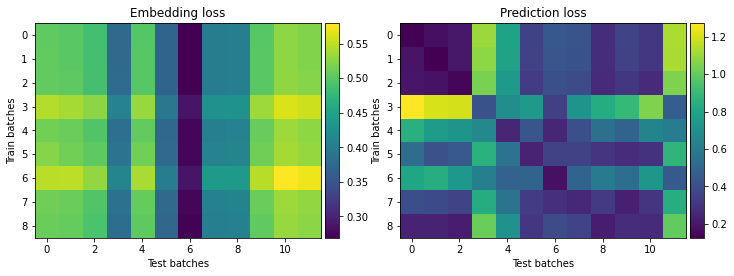

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

figure, ax = plt.subplots(1, 2, figsize = (12, 4))
im0 = ax[0].imshow(emb_loss_np)
ax[0].set_title('Embedding loss')
ax[0].set_xlabel('Test batches')
ax[0].set_ylabel('Train batches')

im1 = ax[1].imshow(pred_loss_np)
ax[1].set_title('Prediction loss')
ax[1].set_xlabel('Test batches')
ax[1].set_ylabel('Train batches')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
figure.colorbar(im0, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
figure.colorbar(im1, cax=cax, orientation='vertical')


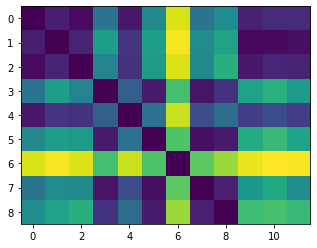

In [33]:
cluster_file = pd.read_csv('cluster_0_8.csv')

s1d1 = np.reshape(cluster_file.iloc[:10, 5].to_numpy(), (1, 10))
s1d2 = np.reshape(cluster_file.iloc[10:20, 5].to_numpy(), (1, 10))
s1d3 = np.reshape(cluster_file.iloc[20:30, 5].to_numpy(), (1, 10))
s2d1 = np.reshape(cluster_file.iloc[30:40, 5].to_numpy(), (1, 10))
s2d4 = np.reshape(cluster_file.iloc[40:50, 5].to_numpy(), (1, 10))
s2d5 = np.reshape(cluster_file.iloc[50:60, 5].to_numpy(), (1, 10))
s3d1 = np.reshape(cluster_file.iloc[60:70, 5].to_numpy(), (1, 10))
s3d6 = np.reshape(cluster_file.iloc[70:80, 5].to_numpy(), (1, 10))
s3d7 = np.reshape(cluster_file.iloc[80:90, 5].to_numpy(), (1, 10))
s4d1 = np.reshape(cluster_file.iloc[90:100, 5].to_numpy(), (1, 10))
s4d8 = np.reshape(cluster_file.iloc[100:110, 5].to_numpy(), (1, 10))
s4d9 = np.reshape(cluster_file.iloc[110:120, 5].to_numpy(), (1, 10))

cluster_emb = np.concatenate([s1d1, s1d2, s1d3, s2d1, s2d4, s2d5, s3d1, s3d6, s3d7, s4d1, s4d8, s4d9], axis=0)

matrix = sklearn.metrics.pairwise.cosine_similarity(cluster_emb, cluster_emb)
plt.imshow(1-matrix[0:9])    
plt.show()

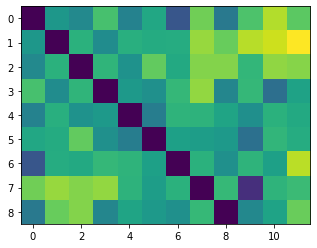

In [36]:
cluster_file = pd.read_csv('cluster_1_3.csv')

s1d1 = np.reshape(cluster_file.iloc[:15, 5].to_numpy(), (1, 15))
s1d2 = np.reshape(cluster_file.iloc[15:30, 5].to_numpy(), (1, 15))
s1d3 = np.reshape(cluster_file.iloc[30:45, 5].to_numpy(), (1, 15))
s2d1 = np.reshape(cluster_file.iloc[45:60, 5].to_numpy(), (1, 15))
s2d4 = np.reshape(cluster_file.iloc[60:75, 5].to_numpy(), (1, 15))
s2d5 = np.reshape(cluster_file.iloc[75:90, 5].to_numpy(), (1, 15))
s3d1 = np.reshape(cluster_file.iloc[90:105, 5].to_numpy(), (1, 15))
s3d6 = np.reshape(cluster_file.iloc[105:120, 5].to_numpy(), (1, 15))
s3d7 = np.reshape(cluster_file.iloc[120:135, 5].to_numpy(), (1, 15))
s4d1 = np.reshape(cluster_file.iloc[135:150, 5].to_numpy(), (1, 15))
s4d8 = np.reshape(cluster_file.iloc[150:165, 5].to_numpy(), (1, 15))
s4d9 = np.reshape(cluster_file.iloc[165:180, 5].to_numpy(), (1, 15))

cluster_emb = np.concatenate([s1d1, s1d2, s1d3, s2d1, s2d4, s2d5, s3d1, s3d6, s3d7, s4d1, s4d8, s4d9], axis=0)

matrix = sklearn.metrics.pairwise.cosine_similarity(cluster_emb, cluster_emb)
plt.imshow(1-matrix[0:9])    
plt.show()

(12, 10)